# Data Transformation for Linear Regression

# Setup

## Load Data

In [ ]:
# Install required packages
!pip install python-dotenv google-api-python-client

# Clone the GitHub repository
!git clone https://@github.com/vmagdale2/Data-Transformation-Linear-Regression.git

# Setup sys.path to recognize utils.py
import sys
sys.path.append('/content/Data-Transformation-Linear-Regression/src')
%cd /content/Data-Transformation-Linear-Regression/src
!pwd
!ls

# Import dependencies
from utils import authenticate_and_load_env, load_data_from_drive
from google.colab import drive
drive.mount('/content/drive')

# Create .env file dynamically in Colab (Recommended)
import os
env_content = """
"""
with open("/content/.env", "w") as f:
    f.write(env_content.strip())

# Load environment variables
from dotenv import load_dotenv
load_dotenv("/content/.env")

# Authenticate Google Drive API
service = authenticate_and_load_env()

# Load data using the file ID
file_id = os.getenv("GDRIVE_FILE_ID")
if not file_id:
    raise ValueError("❌ Error: 'GDRIVE_FILE_ID' is missing or invalid in your .env file.")

# Attempt to load the data
data = load_data_from_drive(service, file_id)  # ✅ Now correctly passing the 'service' argument
print("✅ Data loaded successfully!" if data is not None else "❌ Failed to load data.")

Cloning into 'Data-Transformation-Linear-Regression'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 21), reused 33 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 19.63 KiB | 9.81 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/Data-Transformation-Linear-Regression/src
/content/Data-Transformation-Linear-Regression/src
data_preprocessing.py  evaluation.py  feature_engineering.py  model.py	utils.py
Mounted at /content/drive
✅ Google Drive API authenticated successfully!
✅ Data loaded successfully!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Professional/Portfolio/Transformations/training_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Outlier Detection & Transformation

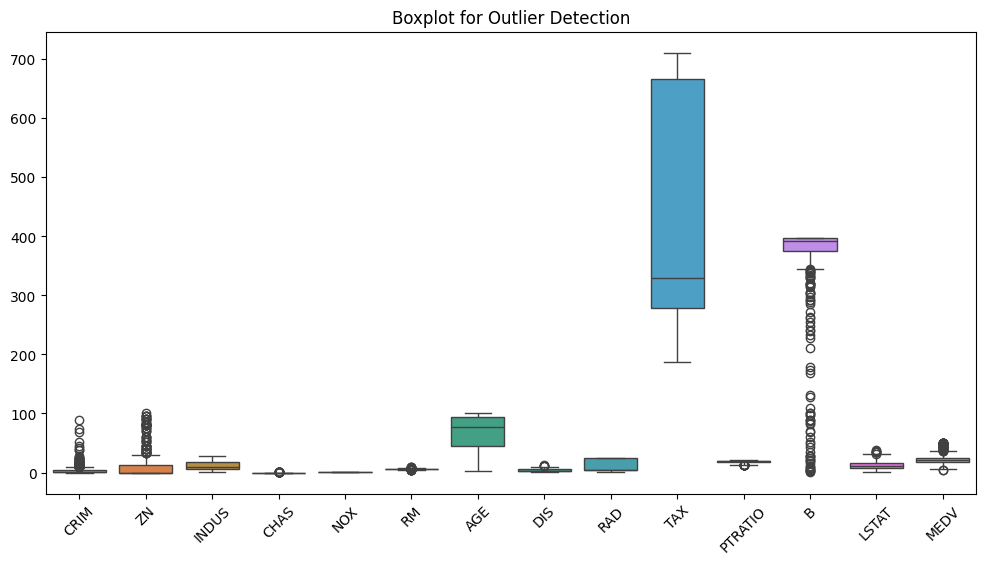

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

## Transform Outliers

In [ ]:
columns_to_transform = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
for col in columns_to_transform:
    df[col] = np.log1p(df[col])

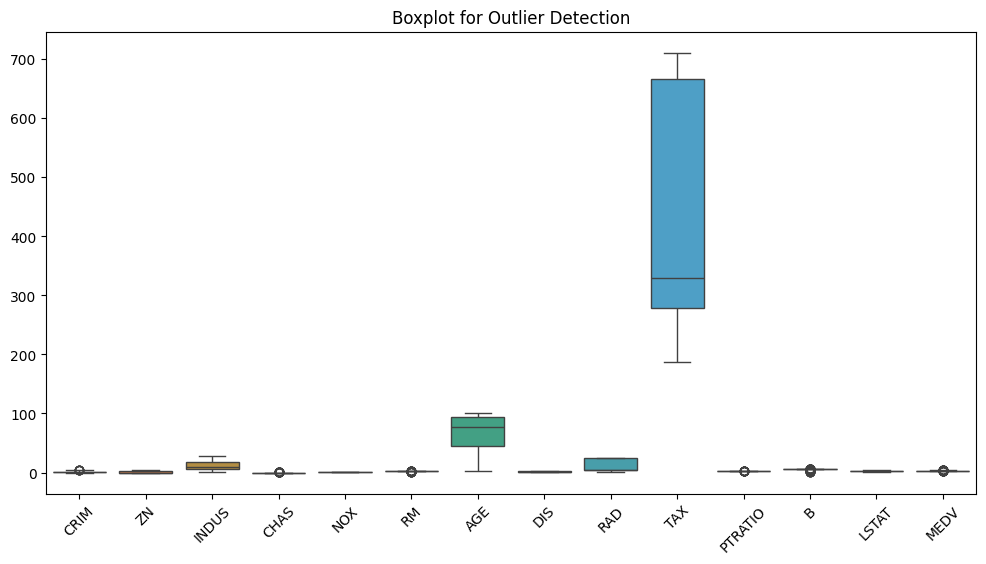

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))
data_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=[np.number]).columns)

# Data Splitting

In [ ]:
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Successfully loaded and transformed data
- Outliers were handled using log transformation
- Data was scaled and encoded where necessary
- Data is split into training and testing sets